In [198]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [199]:
data = pd.read_csv("Mall_Customers.csv")

In [200]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [202]:
data = pd.get_dummies(data=data)

In [203]:
data.head(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False


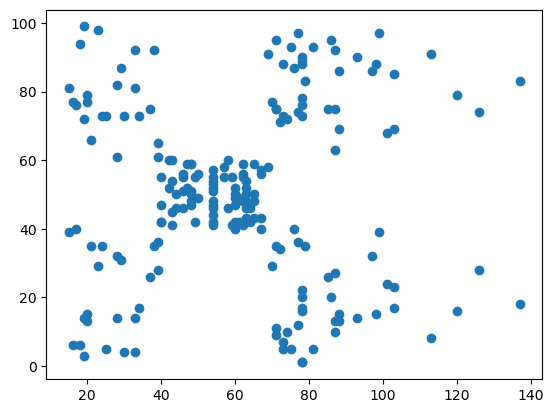

In [204]:
plt.scatter(y=data['Spending Score (1-100)'], x=data['Annual Income (k$)'])

In [205]:
# x = data.loc[:, data.columns != 'CustomerID']
x = data.iloc[:, [2,3]].values

In [206]:
# find the optimal k using elbow method

from sklearn.cluster import KMeans

sum_of_squared_errors = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=0,init="k-means++")
    kmeans.fit(data)
    sum_of_squared_errors.append(kmeans.inertia_)

d:\Program Files\anaconda\envs\standard_ai\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Program Files\anaconda\envs\standard_ai\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Program Files\anaconda\envs\standard_ai\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Program Files\anaconda\envs\standard_ai\lib\site-packages\sklearn\cluster\_kmea

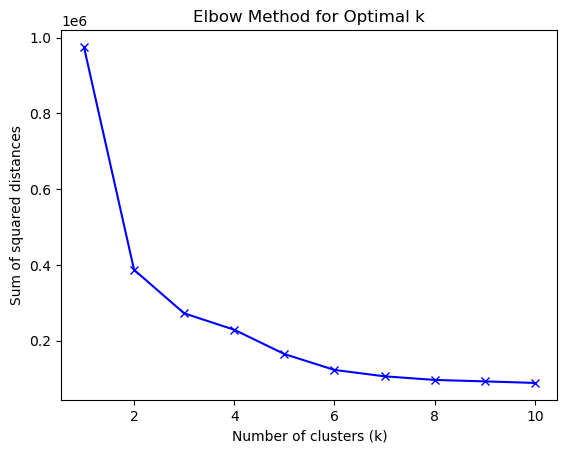

In [207]:
plt.plot(k_range,sum_of_squared_errors,'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [208]:
kmeans_model = KMeans(n_clusters=5,init="k-means++",random_state=0)
# TODO what is even random state here???

In [209]:
y_kmeans = kmeans_model.fit_predict(x)

d:\Program Files\anaconda\envs\standard_ai\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


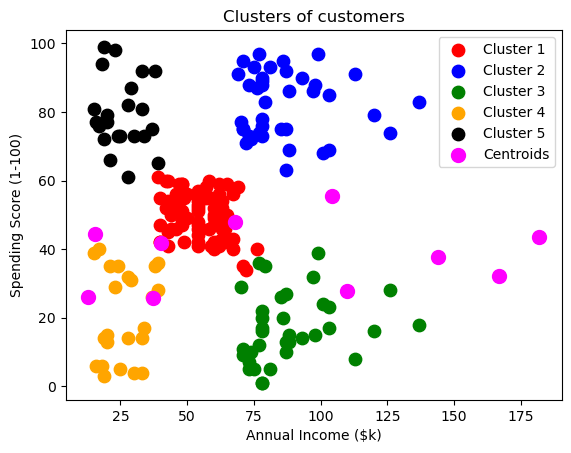

In [213]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1], s = 80, c="red", label="Cluster 1")
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1], s = 80, c="blue", label="Cluster 2")
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1], s = 80, c="green", label="Cluster 3")
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1], s = 80, c="orange", label="Cluster 4")
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans == 4,1], s = 80, c="black", label="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="magenta",label="Centroids")
plt.title("Clusters of customers")
plt.xlabel("Annual Income ($k)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

**Variance** - is the average squared distance from the mean.<br>
If something has _low variance_, most values are _close to the mean_.
Having a low variance means we can guess a future value well by just _guessing the mean of all previous values_.
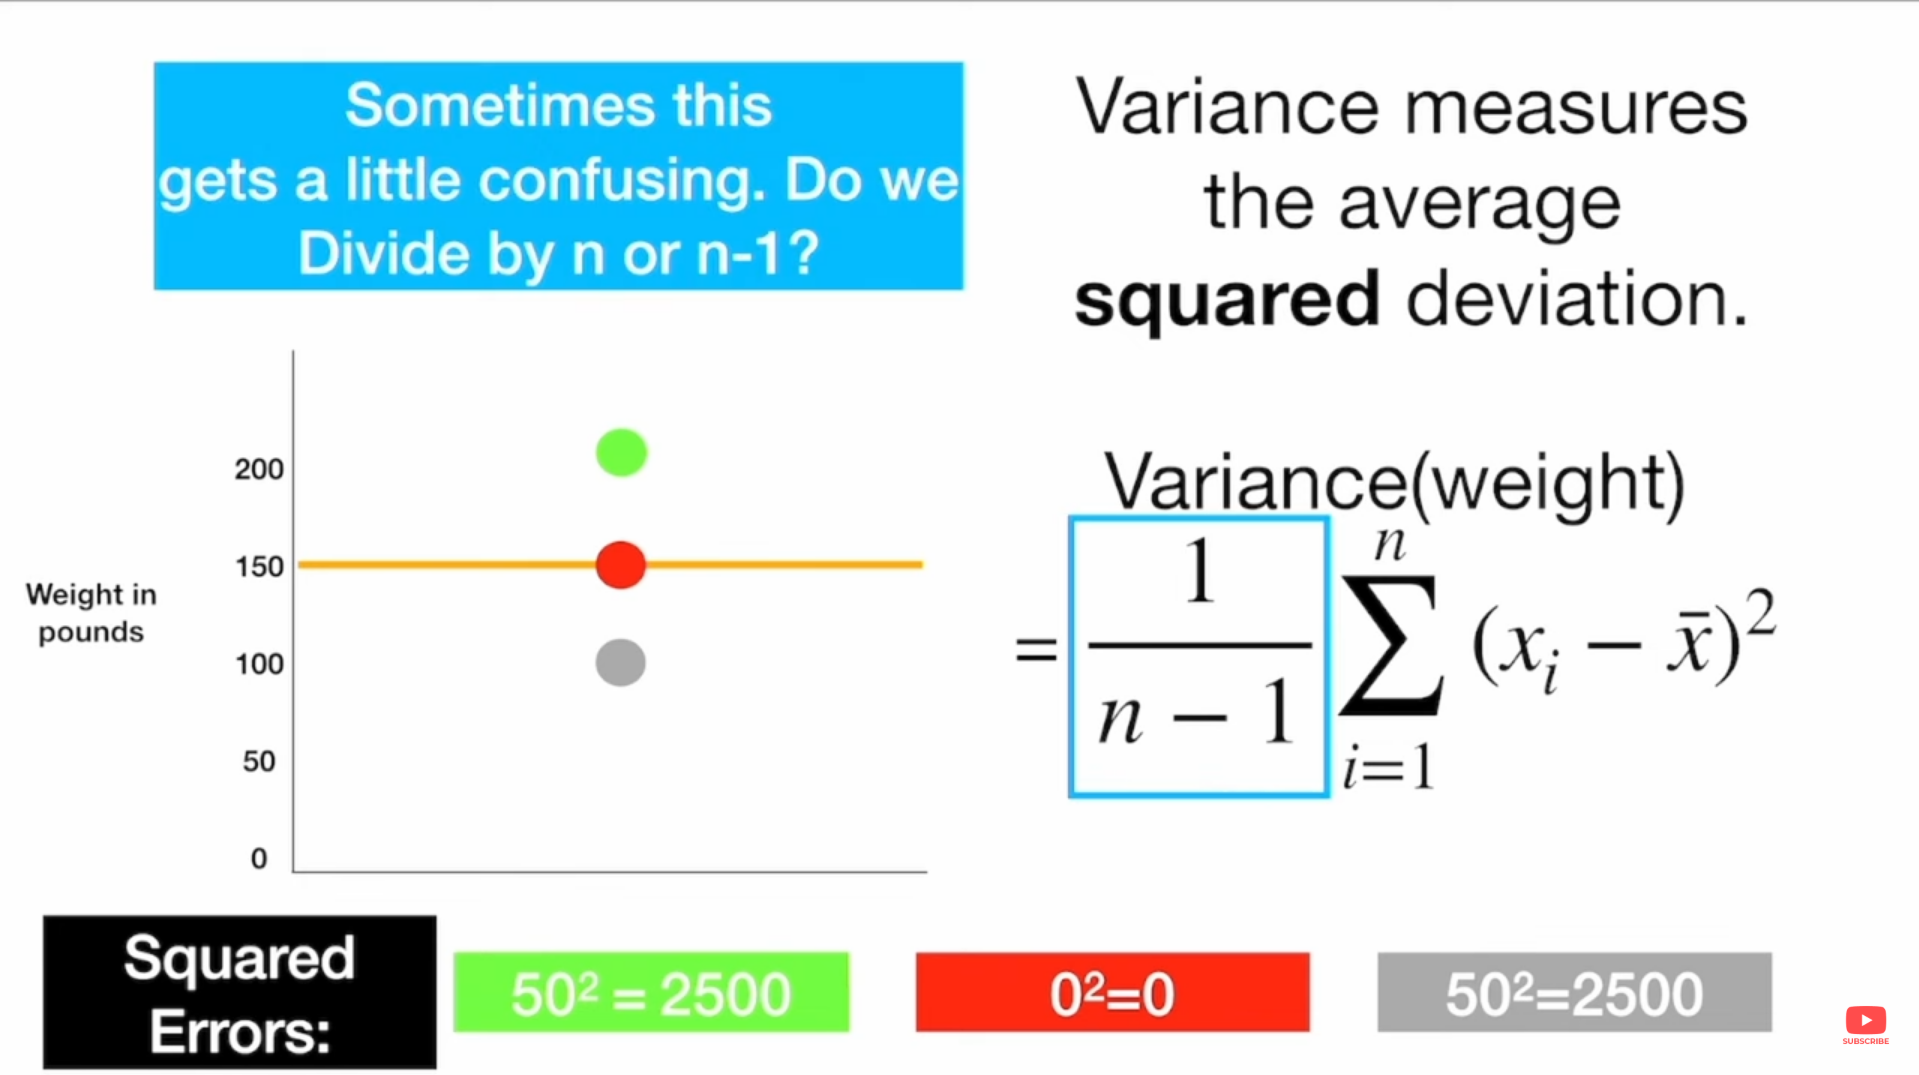